# COMP3314 Assignment1-Q3: Digits Classification (15 Points)

In chapter 3 sample codes, we applied different scikit-learn classifiers for the Iris data set. In this question, we will use the classifiers over another data set: hand-written digits.

Your tasks:

1. Split the dataset into a training set and a test set.
2. Create classifiers from scikit-learn and set their hyper-parameters. The classifiers include:
   * Perceptron
   * Logistic regression
3. Train your classifiers with the training set.
4. Evaluate your classifiers with the test set.
5. Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib as mpl

digits = load_digits()

xs = digits.data
ys = digits.target

print(xs.shape)
print(ys.shape)

(1797, 64)
(1797,)


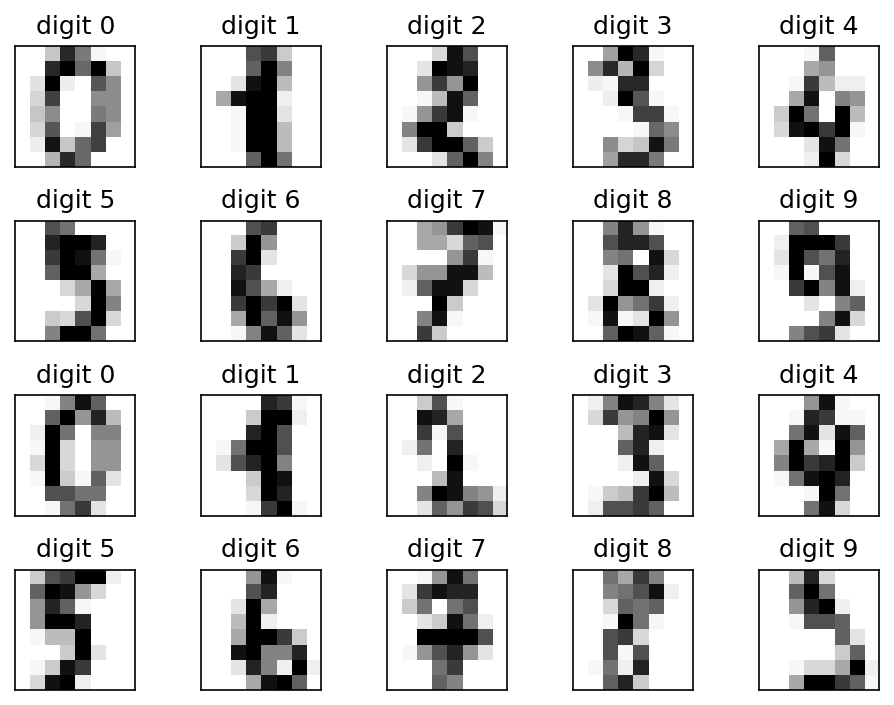

In [4]:
mpl.rcParams["figure.dpi"] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()

for index in range(num_rows * num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap="Greys", interpolation="nearest")
    ax[index].set_title("digit " + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing (3 points)

Hints:
1. Divide training and test data set and apply other techniques we have learned if needed.
2. You may add some common functions here, such as the evaluation code.

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np


def get_accuracy(ys, ys_pred):
    # Your code, implement the code for evaluation
    correct = np.sum(ys == ys_pred)
    total = len(ys)
    accuracy = correct / total
    return accuracy


# Your code, split the train/test dataset
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=123)

## Classifier #1 Perceptron (3 points)

In [12]:
# Example code, including training and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

# Tune the eta0 hyperparameter.
eta0_list = [0.0001, 0.001, 0.01, 0.1, 1]

# Your code here.
for eta in eta0_list:
    perceptron = Perceptron(eta0=eta, random_state=123, max_iter=1000, tol=1e-3)
    perceptron.fit(x_train, y_train)
    y_pred = perceptron.predict(x_test)
    accuracy = get_accuracy(y_test, y_pred)
    print(f"eta0={eta}: Accuracy = {accuracy:.4f}")

eta0=0.0001: Accuracy = 0.9639
eta0=0.001: Accuracy = 0.9667
eta0=0.01: Accuracy = 0.9694
eta0=0.1: Accuracy = 0.9694
eta0=1: Accuracy = 0.9722


## Classifier #2 Logistic Regression (3 points)

In [14]:
# Your code, including training and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

# Tune the C hyperparameter.
C_list = [1e-3, 0.001, 0.01, 1, 10, 100]

# Your code here.
for C_value in C_list:
    logistic_regression = LogisticRegression(C=C_value, random_state=123, max_iter=1000)
    logistic_regression.fit(x_train, y_train)
    y_pred = logistic_regression.predict(x_test)
    accuracy = get_accuracy(y_test, y_pred)
    print(f"C={C_value}: Accuracy = {accuracy:.4f}")

C=0.001: Accuracy = 0.9611
C=0.001: Accuracy = 0.9611
C=0.01: Accuracy = 0.9722
C=1: Accuracy = 0.9667
C=10: Accuracy = 0.9667
C=100: Accuracy = 0.9722


## Classifier #3 Choose it by yourself (3 points)

You are required to choose another classifier in sklearn and evaluate it yourself.  Try to find a better one than the previous two.

In [15]:
# Your code, including training and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [50, 100, 200]

for n_estimators in n_estimators_list:
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    accuracy = get_accuracy(y_test, y_pred)
    print(f"n_estimators={n_estimators}: Accuracy = {accuracy:.4f}")


n_estimators=50: Accuracy = 0.9750
n_estimators=100: Accuracy = 0.9750
n_estimators=200: Accuracy = 0.9750



## Discussions (3 points)

Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?

### Performance Comparison
1. Perceptron
  - The best accuracy for Perceptron is **0.9722** with `eta0=1`.
  - As we increase eta0, the accuracy generally improves, with a plateau at `eta0=0.01` and higher.
2. Logistic Regression
  - The best accuracy for Logistic Regression is also **0.9722**, achieved at both `C=0.01` and `C=100`.
  - The model performs quite consistently across different values of `C`, with a slight dip at `C=1` and `C=10`.
3. Random Forest
  - Random Forest consistently achieves the highest accuracy of **0.9750** across all values of `n_estimators` (50, 100, 200).
  - The stability of the Random Forest model across different values of `n_estimators` suggests that the model is less sensitive to this parameter and performs robustly.

### Best Performing Classifier
- **Random Forest** performs the best, with an accuracy of **0.9750**. This is slightly higher than the best results from both Perceptron and Logistic Regression, which each achieve a maximum accuracy of **0.9722**.
- **Why Random Forest is Best**:
   - **Ensemble Learning**: Random Forest is an ensemble method that combines multiple decision trees, which allows it to capture more complex patterns in the data. This makes it more robust compared to single models like Perceptron and Logistic Regression.
   - **Reduced Overfitting**: The averaging process in Random Forest reduces overfitting, which is common in single models, especially when the dataset is complex.
   
### Worst Performing Classifier:
- The **worst performing model** is **Logistic Regression at `C=0.001`** and **Perceptron at `eta0=0.0001`**, both with an accuracy of **0.9611**.
- **Why Logistic Regression at Low `C` and Perceptron at Low `eta0` Perform Worst**:
   - **Perceptron**: When `eta0` is too low, the learning rate is small, which means the model updates its weights too slowly during training. This results in underfitting, where the model does not learn the patterns in the data well enough.
   - **Logistic Regression**: A very low `C` value means very strong regularization, which penalizes large weights too much. This can lead to underfitting, where the model becomes too simplistic and fails to capture important patterns in the data.
